In [2]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
data = pd.read_csv('D:/work/MachineLearning/data_sets/opendatascience_ADULT/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(32561, 15)

In [6]:
#
# Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?
#
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [7]:
#
# Средний возраст
#
data['age'].describe()[1]

38.581646755320783

In [8]:
#
# Каков средний возраст (признак age) женщин?
#
female = data[data['sex']=='Female']
female['age'].describe()[1]

36.858230433571627

In [9]:
#
# Какова доля граждан Германии (признак native-country)?
#
german = data[data['native-country']=='Germany']
german.shape[0]

137

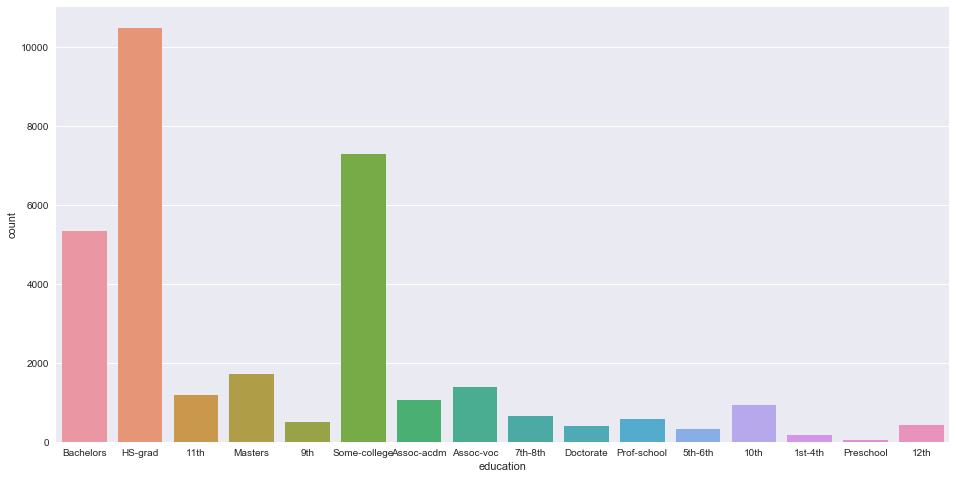

In [10]:
#
# Постройте гистограмму распределения (bar plot) образования людей (признак education)
#
sns.countplot(x='education', data=data)

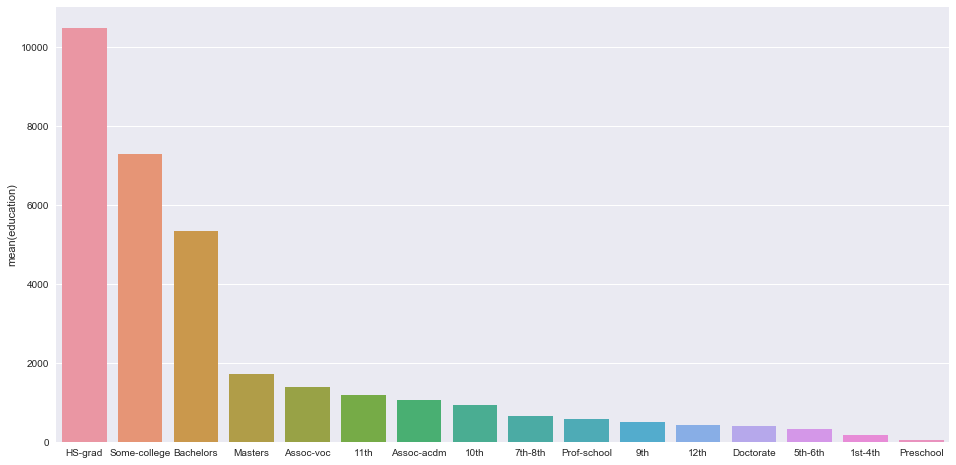

In [11]:
sns.barplot(x=data.education.value_counts().index, y=data.education.value_counts(), data=data)

In [12]:
#
# Каковы средние значения и среднеквадратичные отклонения возраста тех, 
# кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?
#
low50k = data[data['salary']=='<=50K']
high50k = data[data['salary']=='>50K']
low50k['age'].describe()[1:3]


mean    36.783738
std     14.020088
Name: age, dtype: float64

In [13]:
high50k['age'].describe()[1:3]

mean    44.249841
std     10.519028
Name: age, dtype: float64

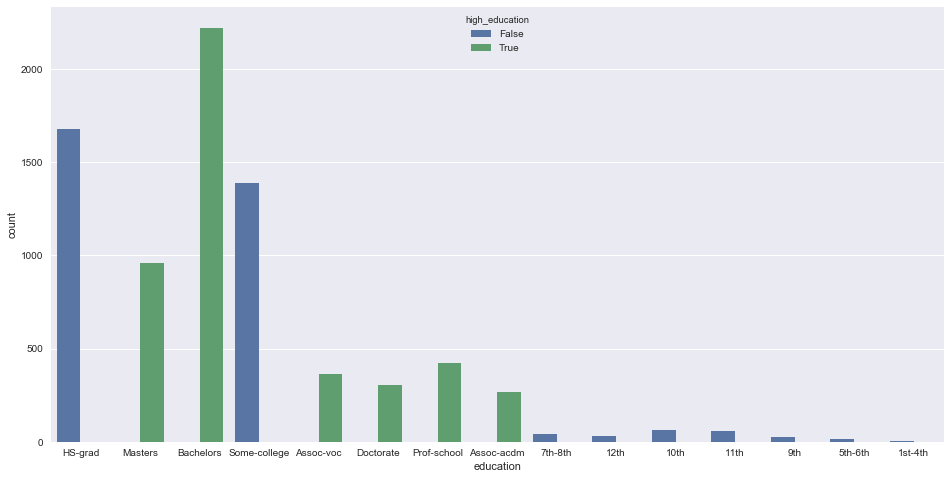

In [14]:
#
# Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? 
# (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)
#
data['high_education'] = data['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])
high50k = data[data['salary']=='>50K']

sns.countplot(x=high50k['education'] , data=high50k, hue="high_education")

In [15]:
pd.crosstab(data['salary'], data['high_education'])

high_education,False,True
salary,,
<=50K,18739,5981
>50K,3306,4535


In [16]:
#
# Выведите статистику возраста для каждой расы (признак race) и каждого пола. 
# Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.
#

data.groupby(['race', 'sex'])['age'].describe(percentiles=[])

count       mean        std   min   50%   max
race               sex                                                    
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  36.0  80.0
                   Male      192.0  37.208333  12.049563  17.0  35.0  82.0
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  33.0  75.0
                   Male      693.0  39.073593  12.883944  18.0  37.0  90.0
Black              Female   1555.0  37.854019  12.637197  17.0  37.0  90.0
                   Male     1569.0  37.682600  12.882612  17.0  36.0  90.0
Other              Female    109.0  31.678899  11.631599  17.0  29.0  74.0
                   Male      162.0  34.654321  11.355531  17.0  32.0  77.0
White              Female   8642.0  36.811618  14.329093  17.0  35.0  90.0
                   Male    19174.0  39.652498  13.436029  17.0  38.0  90.0

In [17]:
#
# Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? 
# Женатыми считаем тех, у кого marital-status начинается с Married 
# (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.
#

pd.crosstab(data['salary'], data['marital-status'])


marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
salary,,,,,,,
<=50K,3980,13,8284,384,10192,959,908
>50K,463,10,6692,34,491,66,85


In [18]:
data['Married'] = data['marital-status'].isin(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,high_education,Married
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True,True


In [19]:
data[(data['sex'] == 'Male') & (data['salary'] == '>50K')]['Married'].value_counts()

True     5965
False     697
Name: Married, dtype: int64

In [20]:
#
# Какое максимальное число часов человек работает в неделю (признак hours-per-week)? 
# Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?
#

data['hours-per-week'].max()

99

In [29]:
hpw99_and_high50k = data[(data['hours-per-week'] == 99) & (data['salary'] == '>50K')]
hpw99 = data[(data['hours-per-week'] == 99)]
len(hpw99_and_high50k.index)

25

In [34]:
100 * len(hpw99_and_high50k.index)/len(hpw99.index)

29.41176470588235

85